# **Projet P6 - révisions et pratique**

Vous allez travailler sur des données extraites de IMDB. On a déjà un peu manipulé des données de films donc vous serez pas complètement perdus comme ça. La variable d'intérêt sera la notation IMDB des films. En effet le succès commercial d'un film n'implique pas nécessairement sa qualité et il convient donc d'aller chercher plus loin que le simple profit dégagé d'une production cinématographique...
À vous !!

Les **objectifs** de ce projet sont multiples :
1. Réviser
2. Pratiquer
3. Vous auto-évaluer et vous évaluer (pour nous)
4. Vous rassurer et vous permettre de réaliser ce que vous savez faire pour pouvoir en parler

1. [Import des librairies](#import_lib)<br>
2. [Import des données](#import_data)<br>
3. [Nettoyage des donnéees](#data_cleaning)<br>
4. [Analyse exploratoire](#exploration)<br>
5. [Pré-traitement](#preprocess)<br>
6. [Une régression linéaire](#reglin)<br>
7. [D'autres modèles de régression](#autres_reg)<br>
8. [De la régression à la classification](#reg_to_class)<br>
9. [Une régression logistique](#reglog)<br>
10. [D'autres modèles de classification](#autre_class)<br>
11. [En option](#option)<br>
    11.1 [Un outil de recommandation](#reco)<br>
    11.2 [Sauvegarder un modèle](#save)<br>
    11.3 [Analyse en composantes principales](#acp)<br>

<a id='import_lib'></a>

## **1. Import des libraries**

**À FAIRE**

> Importer dans la cellule l'ensemble des librairies nécessaires à votre travail. L'idée n'est pas de savoir immédiatement tout ce dont vous aurez besoin mais de faire des aller-retours pour y ajouter vos librairies petit à petit. L'intérêt est une meilleure lisibilité pour un lecteur extérieur qui, en quelques lignes d'import, pourra déjà avoir une idée de ce qui a été fait.

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler, KBinsDiscretizer
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR
from statsmodels.api import OLS, add_constant
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, precision_recall_curve, classification_report, accuracy_score, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix

[CV] END ...................max_depth=100, n_estimators=2000; total time=  56.6s
[CV] END .....max_depth=10, n_estimators=100, random_state=0; total time=   0.3s
[CV] END ....max_depth=10, n_estimators=1500, random_state=0; total time=   5.2s
[CV] END ....max_depth=50, n_estimators=1000, random_state=0; total time=   4.9s
[CV] END ....max_depth=50, n_estimators=2000, random_state=0; total time=   9.5s
[CV] END ...max_depth=100, n_estimators=2000, random_state=0; total time=   9.8s


/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataCon

[CV] END ...................max_depth=100, n_estimators=2000; total time=  58.5s
[CV] END ....max_depth=10, n_estimators=1000, random_state=0; total time=   3.4s
[CV] END ....max_depth=10, n_estimators=2000, random_state=0; total time=   7.4s
[CV] END ....max_depth=50, n_estimators=2000, random_state=0; total time=   9.7s
[CV] END ...max_depth=100, n_estimators=2000, random_state=0; total time=   9.7s


/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataCon

[CV] END ...................max_depth=100, n_estimators=2000; total time=  56.5s
[CV] END ...................max_depth=150, n_estimators=2000; total time=  45.9s
[CV] END .....max_depth=10, n_estimators=500, random_state=0; total time=   1.6s
[CV] END ....max_depth=10, n_estimators=1500, random_state=0; total time=   5.4s
[CV] END ....max_depth=50, n_estimators=1500, random_state=0; total time=   7.0s
[CV] END ....max_depth=100, n_estimators=500, random_state=0; total time=   2.4s
[CV] END ...max_depth=100, n_estimators=1500, random_state=0; total time=   7.2s
[CV] END ....max_depth=150, n_estimators=500, random_state=0; total time=   2.6s
[CV] END ...max_depth=150, n_estimators=1500, random_state=0; total time=   6.6s
[CV] END ....................max_depth=150, n_estimators=500; total time=  13.7s
[CV] END ...................max_depth=150, n_estimators=1000; total time=  28.9s
[CV] END ...................max_depth=150, n_estimators=1500; total time=  37.2s
[CV] END .....max_depth=10, 

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataCon

[CV] END ....................max_depth=150, n_estimators=500; total time=  14.7s
[CV] END ...................max_depth=150, n_estimators=1500; total time=  40.3s
[CV] END .....max_depth=10, n_estimators=500, random_state=0; total time=   1.7s
[CV] END ....max_depth=10, n_estimators=2000, random_state=0; total time=   7.3s
[CV] END ....max_depth=50, n_estimators=1500, random_state=0; total time=   7.1s
[CV] END ...max_depth=100, n_estimators=1000, random_state=0; total time=   4.7s
[CV] END ....max_depth=150, n_estimators=100, random_state=0; total time=   0.5s
[CV] END ....max_depth=150, n_estimators=100, random_state=0; total time=   0.5s
[CV] END ....max_depth=150, n_estimators=500, random_state=0; total time=   2.5s
[CV] END ...max_depth=150, n_estimators=1000, random_state=0; total time=   4.8s
[CV] END ...max_depth=150, n_estimators=2000, random_state=0; total time=   7.4s
[CV] END ....max_depth=50, n_estimators=1500, random_state=0; total time=   7.2s
[CV] END ...max_depth=100, n

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataCon

[CV] END ...................max_depth=100, n_estimators=1500; total time=  43.1s
[CV] END ...................max_depth=150, n_estimators=1500; total time=  40.8s
[CV] END .....max_depth=10, n_estimators=100, random_state=0; total time=   0.3s
[CV] END ....max_depth=10, n_estimators=1000, random_state=0; total time=   3.5s
[CV] END .....max_depth=50, n_estimators=100, random_state=0; total time=   0.5s
[CV] END .....max_depth=50, n_estimators=500, random_state=0; total time=   2.4s
[CV] END ....max_depth=50, n_estimators=1000, random_state=0; total time=   4.7s
[CV] END ....max_depth=100, n_estimators=100, random_state=0; total time=   0.5s
[CV] END ....max_depth=100, n_estimators=100, random_state=0; total time=   0.5s
[CV] END ....max_depth=100, n_estimators=100, random_state=0; total time=   0.4s
[CV] END ....max_depth=100, n_estimators=500, random_state=0; total time=   2.3s
[CV] END ...max_depth=100, n_estimators=1000, random_state=0; total time=   4.7s
[CV] END ...max_depth=100, n

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataCon

<a id='import_data'></a>

## **2. Import des données**

**À FAIRE**

> Importer les données `5000_movies_bis.csv` disponible à la racine de ce document.  
> Afficher les 7 premières lignes et **toutes** les colonnes.    
> Répondre aux questions suivantes (répondez à toutes les questions dans une seule cellule Markdown mais évidemment le code vous ayant permis d'extraire ces informations doit être présent):
>- combien y a-t-il d'observations/de variables ?
>- sur combien d'années se répartissent les données ?
>- combien de pays sont représentés ?
>- combien de réalisateurs différents dans la base ?
>- combien d'acteurs et d'actrices différentes ?

In [2]:
data = pd.read_csv("5000_movies_bis.csv")
data.head(7)
data.info

<bound method DataFrame.info of       color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5038  Color        Scott Smith                     1.0      87.0   
5039  Color                NaN                    43.0      43.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_fb_likes  actor_3_fb_likes      actor_2_name  actor_1_fb_likes  \
0                   0.0             855.0  Joel David Moore           

nombres d'observations:
data.info() 
RangeIndex : il y a 5043 observations

sur combien d'années se répartissent les données ?
data.title_year.max()-data.title_year.min()
sur 100 ans

combien de pays sont représentés ?
data.country.nunique()
65 pays différents

combien de réalisateurs différents dans la base ?
data.director_name.nunique()
il y a 2398 réalisateurs différents

combien d'acteurs et d'actrices différentes ?
data.actor_1_name.nunique()
il y a 2097 acteurs/actrices principaux différents 

total = data.actor_1_name+data.actor_2_name+data.actor_3_name
total.nunique()
il y a 4867 acteurs/actrices différents


<a id='data_cleaning'></a>

## **3. Nettoyage des données**

**À FAIRE**

> Vous allez dans cette partie vous occuper de faire les opérations de nettoyage sur les données. Cela implique donc de regarder en détail :
>- les doublons
>- les variables (à supprimer, à modifier etc...)
>- les valeurs manquantes
>- les zéros
> 
>Ajouter une courte explication des décisions que vous prendrez (gestion des valeurs manquantes, suppression ou modification de certaines variables, etc...).

#### **Les doublons**

In [3]:
data = data.drop_duplicates()
data

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


#### **Suppression de variables**

In [4]:
#sns.pairplot(data, hue = 'imdb_score')

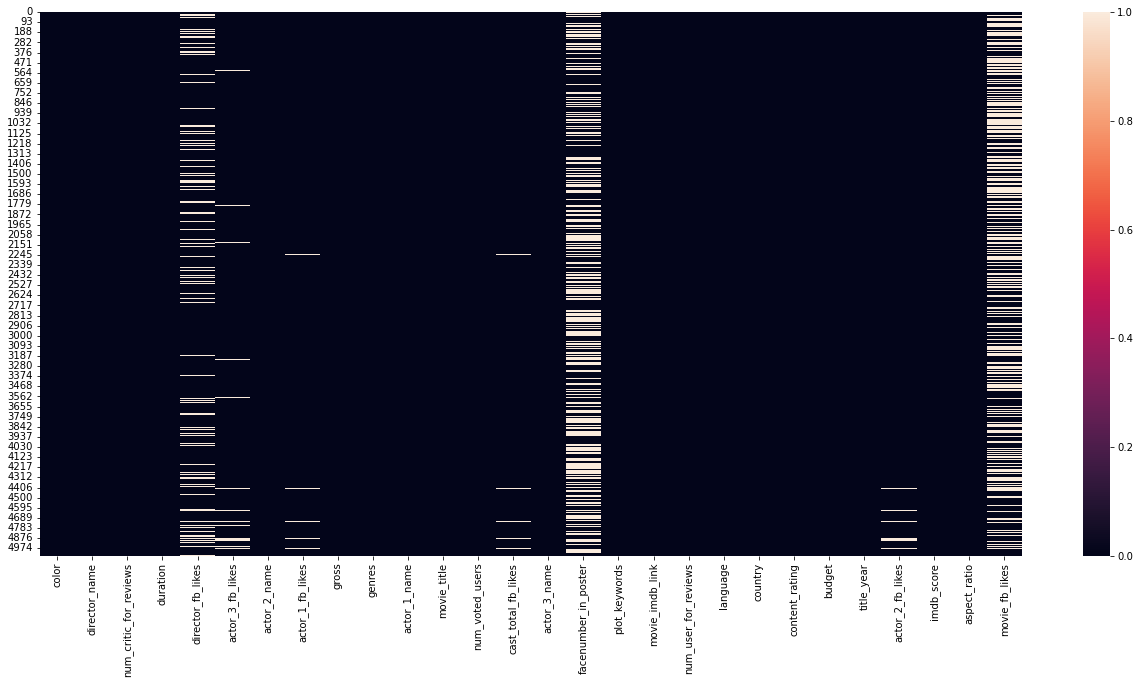

In [5]:
plt.figure(figsize=(22, 10))
sns.heatmap( data == 0);
# visualisation des zéros
# on remarque que movie_fb_likes, facenumber_in_poster et director_fb_likes on beaucoup de zéros, il y a trop de valeurs pour supprimer les lignes, nous allons donc supprimer les 3 colonnes


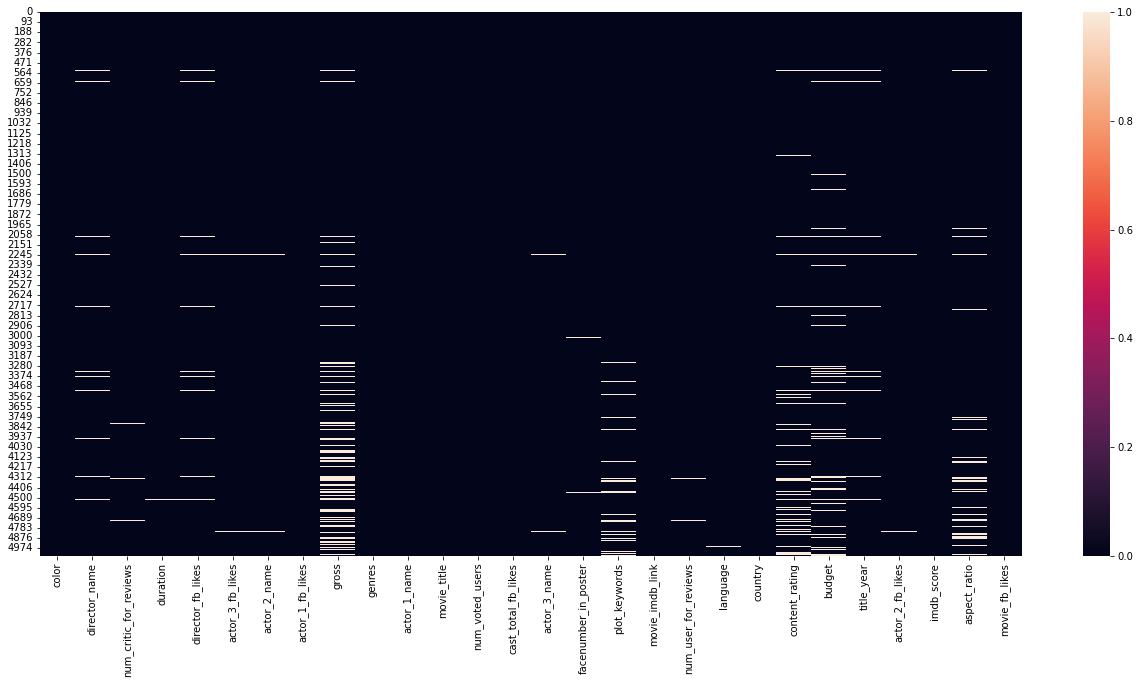

In [6]:
plt.figure(figsize=(22, 10))
sns.heatmap( data.isnull());
# visualisation des Nan
# la colonne gross contient beaucoup de nan mais elle est utile je pense pour la prédiction, je fais le choix de la garder

In [7]:
del data["facenumber_in_poster"]
del data["movie_fb_likes"]
del data["director_fb_likes"]

In [8]:
data.isnull().sum()

color                      19
director_name             103
num_critic_for_reviews     49
duration                   15
actor_3_fb_likes           23
actor_2_name               13
actor_1_fb_likes            7
gross                     671
genres                      0
actor_1_name                7
movie_title                 0
num_voted_users             0
cast_total_fb_likes         0
actor_3_name               23
plot_keywords             152
movie_imdb_link             0
num_user_for_reviews       21
language                   12
country                     5
content_rating            301
budget                    401
title_year                107
actor_2_fb_likes           13
imdb_score                  0
aspect_ratio              327
dtype: int64

#### **Les valeurs manquantes et les zéros**

**Gestion des zéros**

In [9]:
data.dropna(subset=["gross", "budget"], inplace=True)
data.shape
# nous avons supprimé 4998-4141 lignes soit 857

/opt/homebrew/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(4141, 25)

In [10]:
# il y a egalement 327 valeurs de la colonne aspect_ratio manquantes, je choisi encore une fois de supprimer la colonne
del data["aspect_ratio"]

In [11]:
data.isnull().sum()

color                      2
director_name              0
num_critic_for_reviews     6
duration                   2
actor_3_fb_likes          12
actor_2_name               6
actor_1_fb_likes           4
gross                      0
genres                     0
actor_1_name               4
movie_title                0
num_voted_users            0
cast_total_fb_likes        0
actor_3_name              12
plot_keywords             46
movie_imdb_link            0
num_user_for_reviews       2
language                   4
country                    0
content_rating            71
budget                     0
title_year                 0
actor_2_fb_likes           6
imdb_score                 0
dtype: int64

In [12]:
data.dropna(subset=["plot_keywords", "content_rating"], inplace=True)
data.shape
# en ce qui concerne les valeurs des 2 colonnes au dessus, j ai choisi de n'enlever que les lignes concernées

(4040, 24)

In [13]:
# je fais la meme chose pour les colonnes actor_3_fb_likes et actor_3_name où il y a 12 valeurs manquantes
data.dropna(subset=["actor_3_fb_likes", "actor_3_name"], inplace=True)
data.shape

(4033, 24)

In [14]:
data.isnull().sum()

color                     2
director_name             0
num_critic_for_reviews    2
duration                  1
actor_3_fb_likes          0
actor_2_name              0
actor_1_fb_likes          0
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
cast_total_fb_likes       0
actor_3_name              0
plot_keywords             0
movie_imdb_link           0
num_user_for_reviews      0
language                  3
country                   0
content_rating            0
budget                    0
title_year                0
actor_2_fb_likes          0
imdb_score                0
dtype: int64

In [15]:
data.dropna(subset=["color", "num_critic_for_reviews","duration","language"], inplace=True)
data.shape

(4025, 24)

**Gestion des NaN**

In [16]:
# variables numériques
data.loc[data.num_user_for_reviews.isna(),'num_user_for_reviews'] = data.num_user_for_reviews.mean()
data.loc[data.duration.isna(),'duration'] = data.duration.mean()
data.loc[data.actor_1_fb_likes.isna(),'actor_1_fb_likes'] = data.actor_1_fb_likes.mean()
data.loc[data.actor_2_fb_likes.isna(),'actor_2_fb_likes'] = data.actor_2_fb_likes.mean()
data.loc[data.num_critic_for_reviews.isna(),'num_critic_for_reviews'] = data.num_critic_for_reviews.mean()



/opt/homebrew/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [17]:
# variables qualitatives
data.loc[data.color.isna()]
data.loc[data.director_name.isna()]
data.loc[data.actor_2_name.isna()]
data.loc[data.genres.isna()]
data.loc[data.actor_1_name.isna()]
data.loc[data.movie_title.isna()]
data.loc[data.actor_3_name.isna()]

,color,director_name,num_critic_for_reviews,duration,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,actor_1_name,...,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score


#### **Modification de variables**

In [18]:
# la variable genre est à modifier car il y a plusieurs genres pour un film
genre_dummies = data.genres.str.get_dummies('|')
data = pd.concat([data,genre_dummies], axis=1)
data.drop(['genres'], axis=1, inplace=True)
data
# on supprime la colonne genres
#data.drop(['genres'], axis=1, inplace=True)


,color,director_name,num_critic_for_reviews,duration,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,actor_1_name,movie_title,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Color,James Cameron,723.0,178.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,...,0,0,0,0,0,1,0,0,0,0
1,Color,Gore Verbinski,302.0,169.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,...,0,0,0,0,0,0,0,0,0,0
2,Color,Sam Mendes,602.0,148.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,...,0,0,0,0,0,0,0,1,0,0
3,Color,Christopher Nolan,813.0,164.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,...,0,0,0,0,0,0,0,1,0,0
5,Color,Andrew Stanton,462.0,132.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Color,Shane Carruth,143.0,77.0,8.0,David Sullivan,291.0,424760.0,Shane Carruth,Primer,...,0,0,0,0,0,1,0,1,0,0
5034,Color,Neill Dela Llana,35.0,80.0,0.0,Edgar Tancangco,0.0,70071.0,Ian Gamazon,Cavite,...,0,0,0,0,0,0,0,1,0,0
5035,Color,Robert Rodriguez,56.0,81.0,6.0,Peter Marquardt,121.0,2040920.0,Carlos Gallardo,El Mariachi,...,0,0,0,0,1,0,0,1,0,0
5037,Color,Edward Burns,14.0,95.0,133.0,Caitlin FitzGerald,296.0,4584.0,Kerry Bishé,Newlyweds,...,0,0,0,0,0,0,0,0,0,0


In [19]:
data


,color,director_name,num_critic_for_reviews,duration,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,actor_1_name,movie_title,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Color,James Cameron,723.0,178.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,...,0,0,0,0,0,1,0,0,0,0
1,Color,Gore Verbinski,302.0,169.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,...,0,0,0,0,0,0,0,0,0,0
2,Color,Sam Mendes,602.0,148.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,...,0,0,0,0,0,0,0,1,0,0
3,Color,Christopher Nolan,813.0,164.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,...,0,0,0,0,0,0,0,1,0,0
5,Color,Andrew Stanton,462.0,132.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Color,Shane Carruth,143.0,77.0,8.0,David Sullivan,291.0,424760.0,Shane Carruth,Primer,...,0,0,0,0,0,1,0,1,0,0
5034,Color,Neill Dela Llana,35.0,80.0,0.0,Edgar Tancangco,0.0,70071.0,Ian Gamazon,Cavite,...,0,0,0,0,0,0,0,1,0,0
5035,Color,Robert Rodriguez,56.0,81.0,6.0,Peter Marquardt,121.0,2040920.0,Carlos Gallardo,El Mariachi,...,0,0,0,0,1,0,0,1,0,0
5037,Color,Edward Burns,14.0,95.0,133.0,Caitlin FitzGerald,296.0,4584.0,Kerry Bishé,Newlyweds,...,0,0,0,0,0,0,0,0,0,0


In [20]:
data.color.value_counts()

Color               3885
 Black and White     140
Name: color, dtype: int64

In [21]:
data.language.value_counts()
# on remarque qu il y a 3850 lignes pour English
# je décide de ne garder que 3 valeurs : English, europe et autres
# création d'une definition :
def remplace(ligne):
    if ligne["language"] in ["French", "Spanish", "German", "Italian", "Portuguese", "Norwegian", "Dutch","Danish", "Romanian", "Bosnian","Czech", "Hungarian", "Swedish"]:
        return "europe"
    if ligne["language"] == "English":
        return "English"
    else:
        return "autres"
    
data["language"] = data.apply(remplace, axis=1)
data.language.value_counts()

English    3850
europe      101
autres       74
Name: language, dtype: int64

In [22]:
data.country.value_counts()

USA               3173
UK                 349
France             110
Germany             80
Canada              74
Australia           43
Spain               23
Japan               16
Italy               13
Hong Kong           13
China               12
New Zealand         11
South Korea         10
Denmark              9
Ireland              8
India                7
Brazil               6
Norway               6
Mexico               6
Russia               5
South Africa         5
Argentina            4
Netherlands          4
Iran                 4
Thailand             4
Czech Republic       3
Israel               2
Romania              2
Taiwan               2
Hungary              2
West Germany         2
Finland              1
Poland               1
Indonesia            1
Colombia             1
Afghanistan          1
Switzerland          1
Iceland              1
Peru                 1
New Line             1
Soviet Union         1
Georgia              1
Official site        1
Greece     

In [23]:

# je décide de faire la même chose que précédemment en ne gardant que 3 valeurs : USA, Europe et autres_pays
def remplace_pays(ligne):
    if ligne["country"] in ["UK","France", "Germany", "Spain", "Italy","Denmark","Ireland", "Norway", "Netherlands", "Czech Republic", "Romania", "Hungary","West Germany", "Finland","Poland", "Switzerland", "Iceland", "Greece", "Belgium"]:
        return "Europe"
    if ligne["country"] == "USA":
        return "USA"
    else:
        return "autres_pays"
    
data["country"] = data.apply(remplace_pays, axis=1)
data.country.value_counts()

USA            3173
Europe          617
autres_pays     235
Name: country, dtype: int64

In [24]:
data.movie_imdb_link

0       http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1       http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2       http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3       http://www.imdb.com/title/tt1345836/?ref_=fn_t...
5       http://www.imdb.com/title/tt0401729/?ref_=fn_t...
                              ...                        
5033    http://www.imdb.com/title/tt0390384/?ref_=fn_t...
5034    http://www.imdb.com/title/tt0428303/?ref_=fn_t...
5035    http://www.imdb.com/title/tt0104815/?ref_=fn_t...
5037    http://www.imdb.com/title/tt1880418/?ref_=fn_t...
5042    http://www.imdb.com/title/tt0378407/?ref_=fn_t...
Name: movie_imdb_link, Length: 4025, dtype: object

## **4. Analyse exploratoire**

<a id='exploration'></a>

Dans cette partie, vous devez "explorer" vos données. Cette tâche, qui peut s'avérer très vaste, consiste à s'intéresser à l'information contenue dans nos données "au premier abord".

Sont donc attendus dans cette partie :
>- quelques statistiques descriptives
>- entre 6 et 10 visualisations (vous pouvez bien sûr en regrouper plusieurs sur une même figure)
>- et pour chaque résultat/graphique présenté, une explication succinte

In [25]:
data.describe()

,num_critic_for_reviews,duration,actor_3_fb_likes,actor_1_fb_likes,gross,num_voted_users,cast_total_fb_likes,num_user_for_reviews,budget,title_year,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
count,4025.000000,4025.000000,4025.000000,4025.000000,4.025000e+03,4.025000e+03,4025.000000,4025.000000,4.025000e+03,4025.000000,...,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000
mean,161.292422,109.849938,730.719752,7494.724969,4.962863e+07,1.004185e+05,11089.320745,321.480745,4.377565e+07,2002.482484,...,0.042981,0.025839,0.100621,0.000248,0.226087,0.131925,0.039752,0.288696,0.040497,0.016894
std,122.473043,22.559868,1803.025605,15334.097652,6.825178e+07,1.483180e+05,18761.322037,402.062662,2.185308e+08,10.643101,...,0.202840,0.158673,0.300864,0.015762,0.418348,0.338452,0.195399,0.453212,0.197146,0.128892
min,1.000000,37.000000,0.000000,0.000000,1.620000e+02,4.800000e+01,0.000000,1.000000,2.180000e+02,1927.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72.000000,95.000000,180.000000,721.000000,6.619173e+06,1.676100e+04,1810.000000,100.000000,9.000000e+06,1999.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,132.000000,106.000000,422.000000,1000.000000,2.678172e+07,4.930000e+04,3833.000000,199.000000,2.200000e+07,2004.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,218.000000,120.000000,680.000000,12000.000000,6.341148e+07,1.196220e+05,15765.000000,382.000000,5.000000e+07,2010.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,813.000000,330.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,5060.000000,1.221550e+10,2016.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id='preprocess'></a>

In [26]:
gros_budget = data[['movie_title', 'budget', 'imdb_score']].sort_values('budget', ascending=False).iloc[:30].reset_index(drop=True)
gros_budget, gros_budget.mean()
# on remarque que les films ayant un gros budget, on une note supérieure à 6, avec une moyenne de 7,13

/var/folders/_r/h3rcv4k93wv7dlb_1fp8b1pr0000gn/T/ipykernel_40913/2751805765.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  gros_budget, gros_budget.mean()


(                                     movie_title        budget  imdb_score
 0                                      The Host   1.221550e+10         7.0
 1                                Lady Vengeance   4.200000e+09         7.7
 2                                      Fateless   2.500000e+09         7.1
 3                             Princess Mononoke   2.400000e+09         8.4
 4                                      Steamboy   2.127520e+09         6.9
 5                                         Akira   1.100000e+09         8.1
 6                                 Godzilla 2000   1.000000e+09         6.0
 7                                         Tango   7.000000e+08         7.2
 8                        Kabhi Alvida Naa Kehna   7.000000e+08         6.0
 9                                     Red Cliff   5.536320e+08         7.4
 10                     The Legend of Suriyothai   4.000000e+08         6.6
 11      The Messenger: The Story of Joan of Arc   3.900000e+08         6.4
 12         

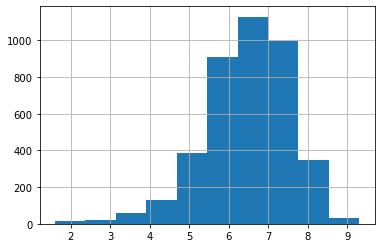

In [27]:
data.imdb_score.hist();
# on remarque une distibution normale des notes avec un pic entre 6 et 7
# Vu la répartition, on va faire 5 classes :

#tres bons : notes entre 9 et 10
#bons : notes entre 9 et 7
#moyens : notes entre 7 et 6
#bofs : notes entre 6 et 5
#aucun interet : notes en dessous de 5

In [28]:
note = data["imdb_score"]
nouvelle_note = np.where(note > 9, 4, 0)
nouvelle_note[(np.where(note <=9))] = 3
nouvelle_note[(np.where(note <=7))] = 2
nouvelle_note[(np.where(note <=6))] = 1
nouvelle_note[np.where(note <= 5)] = 0

for k in range(5):
    print(k , (nouvelle_note==k).sum())

0 351
1 875
2 1570
3 1227
4 2


<AxesSubplot:xlabel='title_year', ylabel='count'>

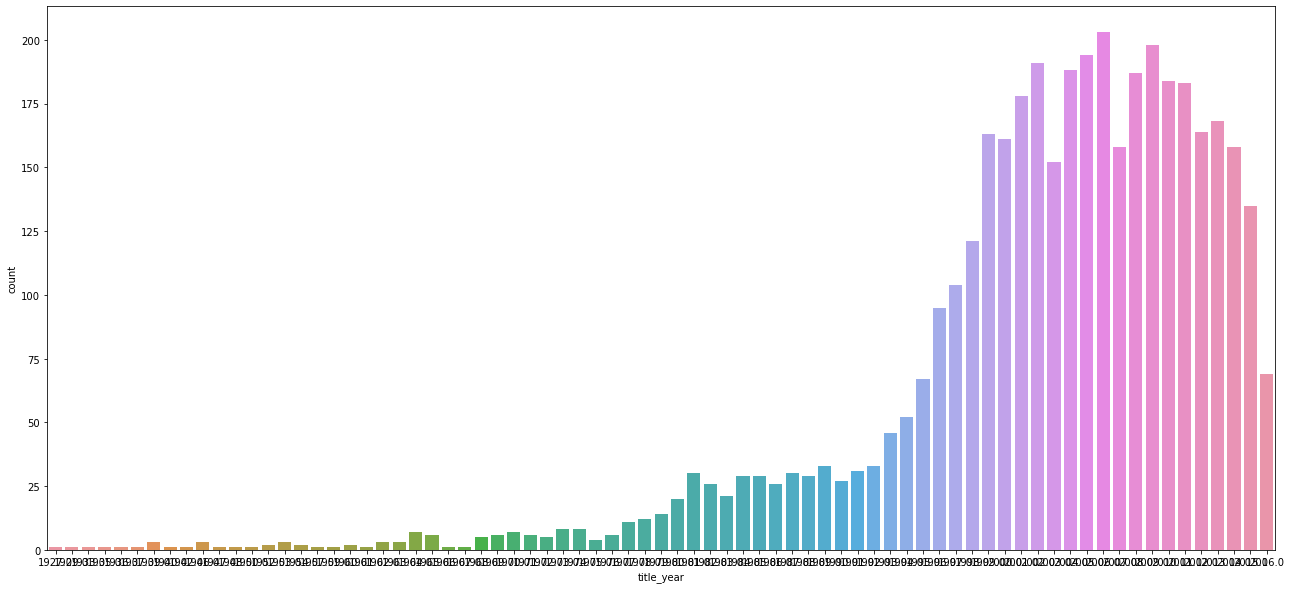

In [29]:
plt.figure(figsize=(22, 10))
sns.countplot(x = 'title_year', data = data)
# on remarque qu il y a eu une augmentation des films produits par an 

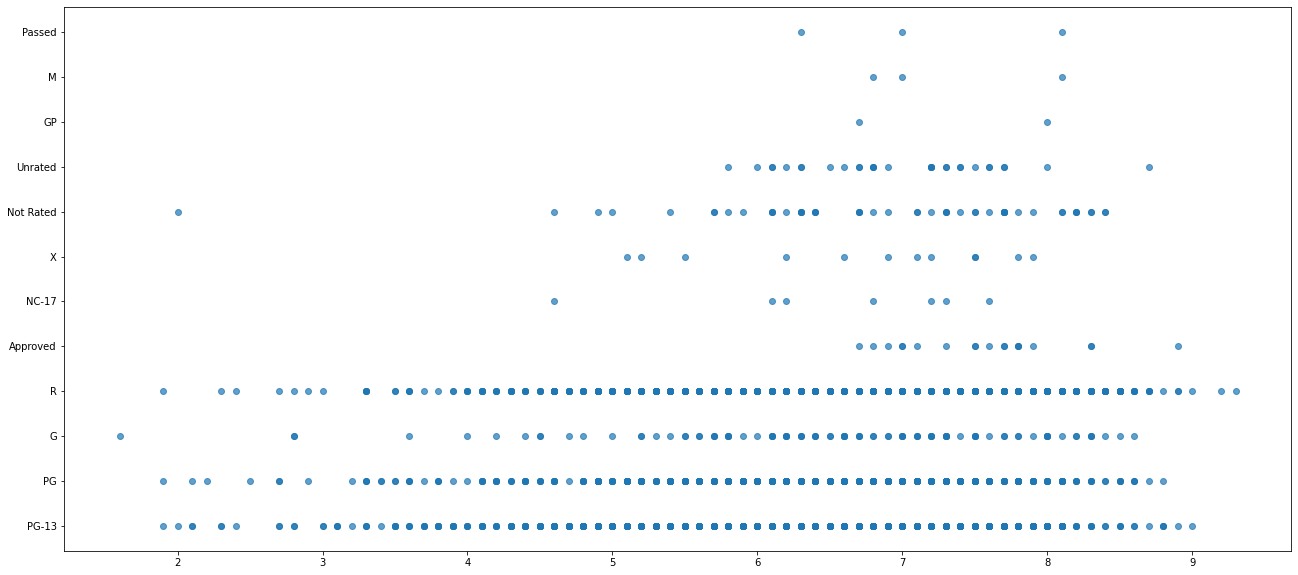

In [30]:
plt.figure(figsize=(22, 10))
plt.scatter(data.imdb_score,data.content_rating, alpha=0.7)
# content rating évalue le contenu d un film par rapport à un groupe d'age, on remarque que Passed, M, GP, Unrated, Not Rated, X, Nc-17 et Approved ont des notes plus élevées
# depuis 1996, il y a une nouvelle notation : G, PG, PG-13, R et NC-17
# je vais donc regrouper les variables

In [31]:
def remplace_categorie(ligne):
    if ligne["content_rating"] in ["Passed", "Approved", "M", "GP","PG", "G"]:
        return "Tous publics"
    elif ligne["content_rating"] in [ "X","NC-17"]:
        return "NC-17"
    elif ligne["content_rating"] == "PG-13":
        return "PG-13"
    elif ligne["content_rating"] in ["Not Rated", "Unrated"]:
        return "Non noté"
    else:
        return ligne["content_rating"]


In [32]:
data["content_rating"] = data.apply(remplace_categorie, axis=1)
data.content_rating.value_counts()

R               1834
PG-13           1346
Tous publics     744
Non noté          82
NC-17             19
Name: content_rating, dtype: int64

<AxesSubplot:>

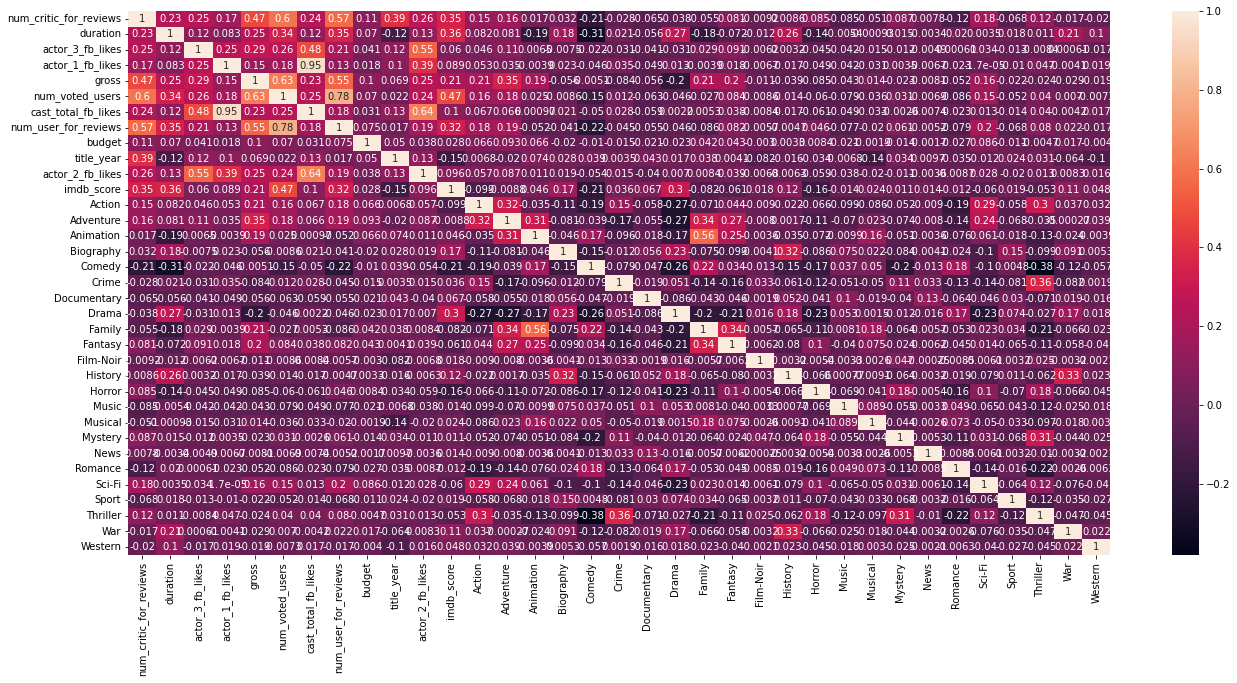

In [33]:
plt.figure(figsize=(22, 10))
sns.heatmap(data.corr(), annot=True)


In [34]:
#sns.pairplot(data, hue='imdb_score');
# inutile et trop long à charger 😅

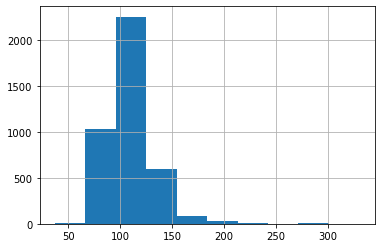

In [35]:
data.duration.hist();
# beaucoup de films durent entre 90 et 130 minutes

## **5. Pré-traitement**

**À FAIRE**

>Maintenant que vous commencez à bien connaître votre base de données, on va la préparer pour la partie modélisation.
>
>Sont donc attendus dans cette partie :
>- restriction aux données utiles à la prédiction : potentiellement certaines variables conservées pour la visualisation sont à supprimer pour la modélisation
>- création des échantillons d'entraînement et de test
>- gestion des variables catégoriques d'un côté et numériques de l'autre
>
>La standardisation n'étant pas toujours nécessaire puisque ça dépend des modèles, vous pouvez choisir de la faire dès maintenant ou bien d'attendre de voir si vous en avez besoin...

In [36]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'actor_3_fb_likes', 'actor_2_name', 'actor_1_fb_likes', 'gross',
       'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_fb_likes',
       'actor_3_name', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_fb_likes', 'imdb_score', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western'],
      dtype='object')

In [37]:
data2 = data
data2.drop(["director_name", "actor_2_name", "actor_1_name","movie_title","actor_3_name", "plot_keywords"],axis = 1, inplace = True)

In [38]:
data.columns

Index(['color', 'num_critic_for_reviews', 'duration', 'actor_3_fb_likes',
       'actor_1_fb_likes', 'gross', 'num_voted_users', 'cast_total_fb_likes',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_fb_likes',
       'imdb_score', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance',
       'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

In [39]:
data2.drop(["movie_imdb_link"],axis = 1, inplace = True)

In [40]:
liste_dummies = list(data2.select_dtypes(include = ['object']))
liste_dummies

['color', 'language', 'country', 'content_rating']

In [41]:
data2 = pd.get_dummies(data2, liste_dummies, drop_first=True)

In [42]:
data2.shape

(4025, 44)

In [43]:
X = data2.drop(["imdb_score"], axis = 1)
y = data2.imdb_score
X.shape, y.shape

((4025, 43), (4025,))

In [44]:
# Affichage des histogrammes des variables
#fig = plt.figure(figsize=(25, 25))
#for i in range(X.shape[1]):
#    ax = fig.add_subplot(10,10, (i+1))
#    ax.hist(X.iloc[:, i], bins=50, color='steelblue', density=True, edgecolor='none')
#    ax.set_title(data2.columns[i], fontsize=14)

In [45]:
ycate = y.values.reshape(-1,1)
ycate.shape


(4025, 1)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, ycate,test_size=0.2, random_state = 2 )
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((3220, 43), (805, 43), (3220, 1), (805, 1))

<a id='reglin'></a>

## **6. Une régression linéaire**

**À FAIRE**

>Tout est dans le titre. Vous devez ici entraîner et tester une régression linéaire pour la prédiction de la note IMDB.  
>Par ailleurs, sont attendus ici :
>- un affichage et une interprétation des coefficients et de leur significativité
>- le choix d'une mesure d'évaluation du modèle et son interprétation
>- une validation croisée pour l'estimation de la qualité du modèle
>- *facultatif : l'ajout d'une régularisation Ridge ou Lasso pour déterminer si les résultats sont meilleurs*

In [47]:
from sklearn.linear_model import LogisticRegression
reglog = LogisticRegression()


In [48]:
#reglog.fit(X_train, y_train)
# j ai eu une erreur à ce niveau là : Unknown label type: 'continuous'
# je dois encoder ma variable

<a id='autres_reg'></a>

In [49]:
var= KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform') 
ycate = var.fit_transform(ycate)

In [50]:
Xcate_train, Xcate_test, ycate_train, ycate_test = train_test_split(X, ycate,test_size=0.2)

In [51]:
reglog = LogisticRegression()

In [52]:
X_train, X_test, ym_train, y_test = train_test_split(X, y,test_size=0.2)

In [53]:
sc = StandardScaler()

X_train = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns, index = X_test.index)
# on standardise
X_test.shape

(805, 43)

In [54]:
X_train_constantes = add_constant(X_train) 

/opt/homebrew/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [55]:
OLS(y_train, X_train_constantes).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9541
Date:                Mon, 03 Jan 2022   Prob (F-statistic):              0.557
Time:                        10:05:10   Log-Likelihood:                -4756.8
No. Observations:                3220   AIC:                             9602.
Df Residuals:                    3176   BIC:                             9869.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           6.4572      0.019    343.288      0.000       6.420       6.494
num_critic_for_reviews         -0.0057      0.029     -0.196      0.845      -0.063       0.052
duration                        0.0223      0.024      0.928      0.353      -0.025       0.069
actor_3_fb_likes                0.0118      0.056      0.211      0.833      -0.098       0.122
actor_1_fb_likes               -0.0933      0.235     -0.397      0.691      -0.554       0.368
gross                          -0.0062      0.029     -0.211      0.833      -0.064       0.051
num_voted_users                 0.0120      0.036      0.338      0.736      -0.058       0.082
cast_total_fb_likes             0.1144      0.312      0.367      0.714      -0.497       0.726
num_user_for_reviews           -0.0338      0.033     -1.023      0.306      -0.099       0.031
budget                          0.0361      0.020      1.843      0.065      -0.002       0.075
title_year                      0.0232      0.025      0.940      0.348      -0.025       0.072
actor_2_fb_likes               -0.0525      0.091     -0.577      0.564      -0.231       0.126
Action                          0.0163      0.024      0.678      0.498      -0.031       0.063
Adventure                       0.0102      0.024      0.423      0.673      -0.037       0.058
Animation                       0.0116      0.024      0.483      0.629      -0.036       0.059
Biography                      -0.0182      0.021     -0.864      0.388      -0.059       0.023
Comedy                          0.0180      0.025      0.723      0.470      -0.031       0.067
Crime                           0.0410      0.022      1.839      0.066      -0.003       0.085
Documentary                     0.0036      0.020      0.177      0.859      -0.036       0.043
Drama                           0.0708      0.025      2.872      0.004       0.022       0.119
Family                          0.0306      0.032      0.953      0.341      -0.032       0.094
Fantasy                         0.0024      0.021      0.112      0.911      -0.039       0.044
Film-Noir                       0.0194      0.019      1.013      0.311      -0.018       0.057
History                         0.0212      0.022      0.979      0.328      -0.021       0.064
Horror                          0.0055      0.023      0.240      0.810      -0.039       0.051
Music                           0.0038      0.019      0.193      0.847      -0.034       0.042
Musical                        -0.0173      0.020     -0.871      0.384      -0.056       0.022
Mystery                         0.0017      0.021      0.084      0.933      -0.039       0.042
News                            0.0090      0.019      0.470      0.639      -0.028       0.046
Romance    

In [56]:
mean_squared_error(OLS(y_train,X_train_constantes).fit().predict(X_train_constantes),y_train)

1.123702987919097

In [57]:
rfe = RFE(LinearRegression())
rfe = rfe.fit(X_train, y_train)

In [58]:
X_train.columns[~rfe.support_]
# les colonnes qui ont été supprimées

Index(['num_critic_for_reviews', 'actor_3_fb_likes', 'gross',
       'num_voted_users', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Documentary', 'Fantasy', 'Horror', 'Music', 'Musical', 'Mystery',
       'News', 'Romance', 'Western', 'color_Color', 'language_autres',
       'country_USA', 'country_autres_pays', 'content_rating_Non noté'],
      dtype='object')

In [59]:
colonnes = X_train.columns[rfe.support_]
colonnes
# on affiche les nouvelles colonnes

Index(['duration', 'actor_1_fb_likes', 'cast_total_fb_likes',
       'num_user_for_reviews', 'budget', 'title_year', 'actor_2_fb_likes',
       'Biography', 'Crime', 'Drama', 'Family', 'Film-Noir', 'History',
       'Sci-Fi', 'Sport', 'Thriller', 'War', 'language_europe',
       'content_rating_PG-13', 'content_rating_R',
       'content_rating_Tous publics'],
      dtype='object')

In [60]:
X_train_new = X_train[colonnes]
X_test_new = X_test[colonnes]
OLS(y_train, add_constant(X_train_new)).fit().summary()

/opt/homebrew/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.785
Date:                Mon, 03 Jan 2022   Prob (F-statistic):             0.0152
Time:                        10:05:10   Log-Likelihood:                -4758.7
No. Observations:                3220   AIC:                             9561.
Df Residuals:                    3198   BIC:                             9695.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           6.4572      0.019    344.272      0.000       6.420       6.494
duration                        0.0202      0.023      0.897      0.370      -0.024       0.064
actor_1_fb_likes               -0.1351      0.096     -1.402      0.161      -0.324       0.054
cast_total_fb_likes             0.1708      0.125      1.369      0.171      -0.074       0.415
num_user_for_reviews           -0.0311      0.021     -1.474      0.141      -0.073       0.010
budget                          0.0385      0.019      2.031      0.042       0.001       0.076
title_year                      0.0245      0.021      1.188      0.235      -0.016       0.065
actor_2_fb_likes               -0.0673      0.051     -1.332      0.183      -0.166       0.032
Biography                      -0.0225      0.020     -1.097      0.273      -0.063       0.018
Crime                           0.0424      0.021      2.018      0.044       0.001       0.084
Drama                           0.0599      0.021      2.842      0.005       0.019       0.101
Family                          0.0366      0.028      1.289      0.198      -0.019       0.092
Film-Noir                       0.0189      0.019      0.998      0.318      -0.018       0.056
History                         0.0208      0.021      0.972      0.331      -0.021       0.063
Sci-Fi                          0.0205      0.020      1.007      0.314      -0.019       0.060
Sport                          -0.0280      0.019     -1.451      0.147      -0.066       0.010
Thriller                       -0.0336      0.021     -1.583      0.114      -0.075       0.008
War                            -0.0322      0.020     -1.571      0.116      -0.072       0.008
language_europe                -0.0370      0.019     -1.932      0.053      -0.075       0.001
content_rating_PG-13           -0.0441      0.059     -0.748      0.454      -0.160       0.071
content_rating_R               -0.0613      0.061     -1.005      0.315      -0.181       0.058
content_rating_Tous publics    -0.0668      0.053     -1.264      0.206      -0.170       0.037
==============================================================================
Omnibus:                      315.008   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              478.345
Skew:                          -0.732   Prob(JB):                    1.35e-104
Kurtosis:                       4.192   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **7. D'autres modèles de régression**

**À FAIRE**

>Tout est encore dans le titre. Mettez en place le modèle **de régression** que vous souhaitez.  
>Sont donc attendus dans cette partie :
>- une petite phrase pour justifier votre choix
>- les pré-traitements supplémentaires nécessaires s'il y en a
>- évaluation du modèle avec `cross_val_score` ou `cross_validate`
>- affinage des éventuels hyperparamètres avec `GridSearchCV`

In [61]:
rbf = SVR(kernel='rbf')
linear = SVR(kernel='linear')
poly = SVR(kernel='poly')
rbf.fit(X_train, y_train)
y_predrbf = rbf.predict(X_test)
y_predrbf.min(), y_predrbf.max(), mean_squared_error(y_predrbf, y_test)

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(5.762507333514732, 7.438582512374444, 1.178678288018012)

<a id='irr'></a>

In [62]:
linear.fit(X_train, y_train)
y_predlin = linear.predict(X_test)

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
y_predlin.min(), y_predlin.max(), mean_squared_error(y_predlin, y_test)

(5.968443614967874, 6.92463740465141, 1.1567832969608023)

In [64]:
poly.fit(X_train_new, y_train)
y_pred_poly = poly.predict(X_test_new)
y_pred_poly.min(), y_pred_poly.max()

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(2.925381865444442, 48.4038460954493)

In [65]:
mean_squared_error(y_pred_poly, y_test)

3.340827108307628

<a id='reg_to_class'></a>

In [66]:
rfr = RandomForestRegressor(n_estimators = 500)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

/var/folders/_r/h3rcv4k93wv7dlb_1fp8b1pr0000gn/T/ipykernel_40913/3885639855.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


In [67]:
mean_squared_error(rfr_pred, y_test)

1.1973981680993782

In [68]:
param_grid = {
    'max_depth': [5,10, 50, 100, 150],
    'n_estimators': [100, 500, 1000, 1500, 2000]
}

grid_search_rfr = GridSearchCV(RandomForestRegressor(), param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [69]:
grid_search_rfr.fit(X_train, y_train)
grid_search_rfr.best_params_

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] END .....................max_depth=5, n_estimators=1000; total time=   7.8s
[CV] END .....................max_depth=10, n_estimators=100; total time=   1.4s
[CV] END .....................max_depth=10, n_estimators=100; total time=   1.4s
[CV] END .....................max_depth=10, n_estimators=500; total time=   6.9s
[CV] END ....................max_depth=10, n_estimators=1500; total time=  21.8s
[CV] END .....................max_depth=50, n_estimators=500; total time=  14.0s
[CV] END ....................max_depth=50, n_estimators=2000; total time=  55.2s


/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataCon

[CV] END ......................max_depth=5, n_estimators=100; total time=   0.8s
[CV] END .....................max_depth=5, n_estimators=1500; total time=  11.4s
[CV] END ....................max_depth=10, n_estimators=1000; total time=  13.9s
[CV] END ....................max_depth=10, n_estimators=2000; total time=  30.0s
[CV] END ....................max_depth=50, n_estimators=2000; total time=  55.0s


/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataCon

[CV] END ......................max_depth=5, n_estimators=100; total time=   0.8s
[CV] END .....................max_depth=5, n_estimators=1500; total time=  11.4s
[CV] END .....................max_depth=10, n_estimators=500; total time=   6.9s
[CV] END ....................max_depth=10, n_estimators=2000; total time=  29.6s
[CV] END ....................max_depth=50, n_estimators=1500; total time=  40.6s
[CV] END ...................max_depth=100, n_estimators=1000; total time=  27.6s


/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataCon

[CV] END ......................max_depth=5, n_estimators=500; total time=   4.0s
[CV] END .....................max_depth=5, n_estimators=1500; total time=  11.1s
[CV] END ....................max_depth=10, n_estimators=1000; total time=  14.1s
[CV] END .....................max_depth=50, n_estimators=100; total time=   2.5s
[CV] END .....................max_depth=50, n_estimators=100; total time=   2.8s
[CV] END .....................max_depth=50, n_estimators=500; total time=  13.5s
[CV] END ....................max_depth=50, n_estimators=1500; total time=  41.6s
[CV] END ...................max_depth=100, n_estimators=1000; total time=  27.2s
[CV] END ......................max_depth=5, n_estimators=500; total time=   4.1s
[CV] END .....................max_depth=5, n_estimators=2000; total time=  14.8s
[CV] END ....................max_depth=10, n_estimators=1500; total time=  21.8s
[CV] END ....................max_depth=50, n_estimators=1000; total time=  27.1s
[CV] END ...................

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataCon

[CV] END .....................max_depth=5, n_estimators=1000; total time=   7.8s
[CV] END .....................max_depth=5, n_estimators=2000; total time=  15.0s
[CV] END ....................max_depth=10, n_estimators=2000; total time=  30.1s
[CV] END ....................max_depth=50, n_estimators=1500; total time=  43.2s
[CV] END ...................max_depth=100, n_estimators=1500; total time=  42.1s


/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataCon

{'max_depth': 5, 'n_estimators': 2000}

In [70]:
y_grid_pred_rfr = grid_search_rfr.predict(X_test)

In [71]:
mean_squared_error(y_grid_pred_rfr, y_test.values)

1.1536274444957364

## **8. De la régression à la classification**

**À FAIRE**

>Transformez le problème de régression en un problème de classification par une discrétisation du score IMDB en 5 classes : nul, bof, sympa, bon, super.  
>Justifiez votre découpage en indiquant quels seuils vous avez utilisé et pourquoi.

In [72]:
# le découpage avait déjà été fait au dessus

<a id='reglog'></a>

In [73]:
#rfe = RFE(LogisticRegression(solver = 'lbfgs'), 20)
rfe = rfe.fit(X_train_new, y_train)
colonnes = X_train_new.columns[rfe.support_]

In [74]:
X_train_new.columns[rfe.support_]
# affichage de nos colonnes

Index(['actor_1_fb_likes', 'cast_total_fb_likes', 'budget', 'actor_2_fb_likes',
       'Drama', 'Family', 'language_europe', 'content_rating_PG-13',
       'content_rating_R', 'content_rating_Tous publics'],
      dtype='object')

In [75]:
Xcate_train_rfe = Xcate_train[colonnes]
Xcate_test_rfe = Xcate_test[colonnes]

In [76]:
models = {'KNN' : KNeighborsClassifier(n_neighbors = 7),
          'Logistic Regression' : LogisticRegression(),
          #'SVC Linear' : SVC(kernel='linear', C=100, gamma= 'scale', random_state = 0),
          #'SVC Poly' : SVC(kernel='poly', C=100, gamma= 'scale', degree = 3, random_state = 0),
          #'SVC Rbf' : SVC(kernel='rbf', C=100, gamma= 'scale', random_state = 0),
          'RandomForest' : RandomForestClassifier(),
          'DecisionTree' : DecisionTreeClassifier(),
         }

model_liste = []
score = []
for i, j in models.items() :
    model = j
    model.fit(Xcate_train_rfe, ycate_train)
    model_liste.append(i)
    score2 = model.score(Xcate_test_rfe, ycate_test)
    score.append(round(score2,2))
    y_predict = model.predict(Xcate_test_rfe)

    print(i)
    print(classification_report(ycate_test, y_predict))
  

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classific

KNN
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        10
         1.0       0.08      0.03      0.04        39
         2.0       0.35      0.36      0.36       253
         3.0       0.54      0.66      0.59       429
         4.0       0.00      0.00      0.00        74

    accuracy                           0.46       805
   macro avg       0.19      0.21      0.20       805
weighted avg       0.40      0.46      0.43       805

Logistic Regression
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        10
         1.0       0.00      0.00      0.00        39
         2.0       0.00      0.00      0.00       253
         3.0       0.53      1.00      0.70       429
         4.0       0.00      0.00      0.00        74

    accuracy                           0.53       805
   macro avg       0.11      0.20      0.14       805
weighted avg       0.28      0.53      0.37       805

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
resultats = pd.DataFrame({"model" : model_liste, "score" : score})
resultats

,model,score
0,KNN,0.46
1,Logistic Regression,0.53
2,RandomForest,0.53
3,DecisionTree,0.44


In [78]:
param_grid = {
    'max_depth': [10, 50, 100, 150],
    'n_estimators': [100, 500, 1000, 1500, 2000],
    'random_state' :[0]
}

grid_search_rfc = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search_rfc.fit(Xcate_train_rfe, ycate_train)
print(classification_report(ycate_test, grid_search_rfc.predict(Xcate_test_rfe)))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ......................max_depth=5, n_estimators=500; total time=   4.1s
[CV] END .....................max_depth=5, n_estimators=2000; total time=  14.9s
[CV] END ....................max_depth=10, n_estimators=1500; total time=  22.0s
[CV] END ....................max_depth=50, n_estimators=1000; total time=  27.0s
[CV] END ....................max_depth=100, n_estimators=100; total time=   2.7s
[CV] END ....................max_depth=100, n_estimators=100; total time=   2.7s
[CV] END ....................max_depth=100, n_estimators=100; total time=   2.8s
[CV] END ....................max_depth=100, n_estimators=500; total time=  14.0s
[CV] END ...................max_depth=100, n_estimators=1000; total time=  28.4s
[CV] END ....................max_depth=150, n_estimators=100; total time=   2.7s
[CV] END ....................max_depth=150, n_estimators=100; total time=   2.8s
[CV] END ....................max_depth=150, n_es

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataCon

[CV] END ......................max_depth=5, n_estimators=100; total time=   0.8s
[CV] END .....................max_depth=5, n_estimators=1000; total time=   7.7s
[CV] END .....................max_depth=10, n_estimators=100; total time=   1.3s
[CV] END .....................max_depth=10, n_estimators=500; total time=   6.8s
[CV] END ....................max_depth=10, n_estimators=1000; total time=  14.1s
[CV] END .....................max_depth=50, n_estimators=100; total time=   2.6s
[CV] END .....................max_depth=50, n_estimators=500; total time=  13.4s
[CV] END ....................max_depth=50, n_estimators=1000; total time=  27.8s
[CV] END ....................max_depth=100, n_estimators=500; total time=  14.1s
[CV] END ....................max_depth=100, n_estimators=500; total time=  14.1s
[CV] END ...................max_depth=100, n_estimators=1500; total time=  40.8s
[CV] END ...................max_depth=150, n_estimators=1000; total time=  29.5s
[CV] END ...................

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataCon

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        10
         1.0       0.00      0.00      0.00        39
         2.0       0.47      0.38      0.42       253
         3.0       0.59      0.82      0.69       429
         4.0       0.50      0.04      0.07        74

    accuracy                           0.56       805
   macro avg       0.31      0.25      0.24       805
weighted avg       0.51      0.56      0.50       805



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **9. Une régression logistique**

**À FAIRE**

>Vous devez ici entraîner et tester une régression logistique pour la prédiction de la classe du film.  
>Par ailleurs, sont attendus ici :
>- un affichage et une interprétation des *Odds-ratio* et de leur significativité
>- le choix d'une ou plusieurs mesures d'évaluation du modèle et leur interprétation
>- une validation croisée pour l'évaluation modèle
>- l'affinage des hyperparamètres avec l'outil qui va bien
>- peut-on tracer les courbes ROC et calculer l'AUC ? Pourquoi ?

In [79]:
reglog = LogisticRegression()
reglog.fit(Xcate_train_rfe, ycate_train)

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [80]:
reglog.score(Xcate_test_rfe, ycate_test)

0.5329192546583851

In [83]:

matrice = confusion_matrix(ycate_test, reglog.predict(Xcate_test_rfe))

matrice = pd.DataFrame(matrice, columns = ['predits' + str(_) for _ in reglog.classes_])
matrice.index = ['vrais' + str(_) for _ in reglog.classes_]
matrice

,predits0.0,predits1.0,predits2.0,predits3.0,predits4.0
vrais0.0,0,0,0,10,0
vrais1.0,0,0,0,39,0
vrais2.0,0,0,0,253,0
vrais3.0,0,0,0,429,0
vrais4.0,0,0,0,74,0


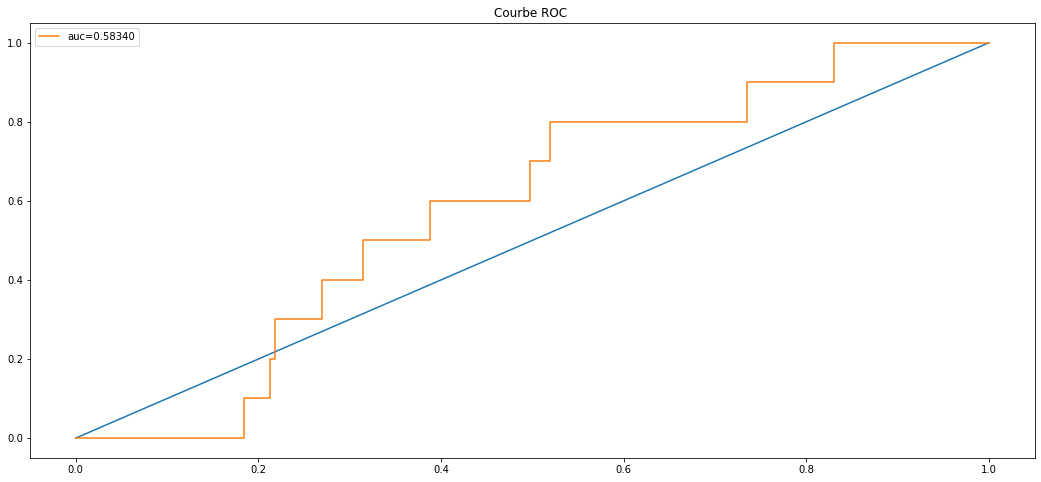

In [91]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
proba = reglog.predict_proba(Xcate_test_rfe)
fpr0, tpr0, thresholds0 = roc_curve(ycate_test, proba[:, 0], pos_label=reglog.classes_[0], drop_intermediate=False)

fig, ax = plt.subplots(1, 1, figsize=(18,8))
ax.plot([0, 1], [0, 1])

aucf = auc(fpr0, tpr0)
ax.plot(fpr0, tpr0, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC ')

ax.legend();

In [92]:
precision, recall, thresholds = precision_recall_curve(ycate_test, proba[:, 0], pos_label=reglog.classes_[0])

In [95]:
tab = pd.DataFrame(dict(precision=precision, recall=recall,threshold=[0] + list(thresholds)))
tab.head(n=2)

,precision,recall,threshold
0,0.014925,1.0,0.000000
1,0.013453,0.9,0.000001


<a id='autre_class'></a>

## **10. Un autre modèle de classification**

**À FAIRE**

>Au choix, une autre méthode de classification. Évidemment, sentez-vous libre d'en essayer plus d'une et de les comparer.  
>Sont donc attendus dans cette partie :
>- une petite phrase pour justifier votre choix
>- les pré-traitements supplémentaires nécessaires s'il y en a
>- évaluation du modèle
>- étude de l'importance des paramètres, si votre modèle le permet
>- affinage des éventuels hyperparamètres

<a id='option'></a>

## **11. En option**

Bravo, si vous êtes arrivés jusqu'ici !!!

Pour les flèches, hésitez pas à continuer si vous en voulez encore et pour les autres, hésitez pas à y revenir à l'occasion.

<a id='reco'></a>

### **11.1. Un outil de recommandation**

**À FAIRE**

>Question un peu plus ouverte pour terminer: en utilisant une méthode de clustering (donc d'apprentissage non-supervisé), construisez un petit outil de recommandation de films.  
>Pour un film donné, votre méthode doit donc retourner les films qui lui ressemblent le plus.  
>Pour rappel, on avait fait un petit exercice comme celui-cilorsqu'on avait vu les *k-plus proches voisins*, donc vous êtes invités à ne pas utiliser kNN, sinon c'est pas drôle...  
>Vous pourrez bientôt aller plus loin en créant une petite application web permettant une interface pour choisir un film.

<a id='save'></a>

### **11.2. Sauvegarder un modèle**

**À FAIRE**

>Utilisez le module `pickle` pour sauvegarder le meilleur de vos modèles et le recharger ensuite.

<a id='acp'></a>

### **11.3. Analyse en Composantes Principales**

**À FAIRE**

>Utilisez une ACP pour visualiser vos données en dimension 2 ou 3 avec des points dont la couleur varie en fonction de la classe.  